In [24]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pickle
import cv2
from IPython.display import Image, display


# Data Inspection

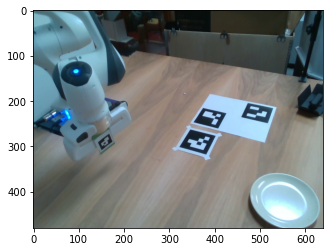

In [25]:
with open('caldata_hands_down.pkl', 'rb') as f:
    data=pickle.load(f)
    
plt.imshow(data[0]['imgs'][0][:,:,::-1])

## Corner Detection

In [26]:
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
aruco_param = cv2.aruco.DetectorParameters_create()
aruco_param.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_SUBPIX
target_idx = 9
for i,d in enumerate(data):
    d['corners']=[]
    for j, img in enumerate(d['imgs']):
        result=cv2.aruco.detectMarkers(img, dictionary=aruco_dict, parameters=aruco_param)
        corners, idx, rej = result
        if target_idx in idx:
            target_corner=corners[idx.squeeze().tolist().index(target_idx)][0,0,:].tolist()
            d['corners'].append(target_corner)
        else:
            d['corners'].append(None)

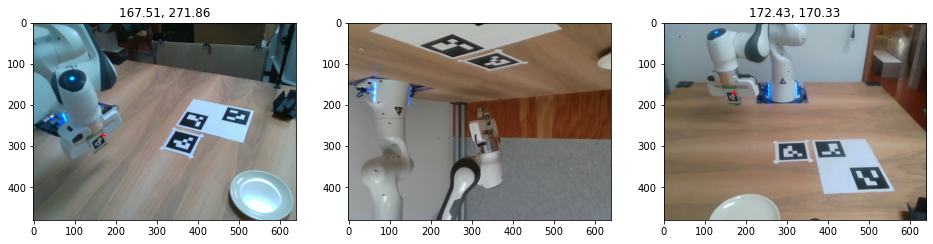

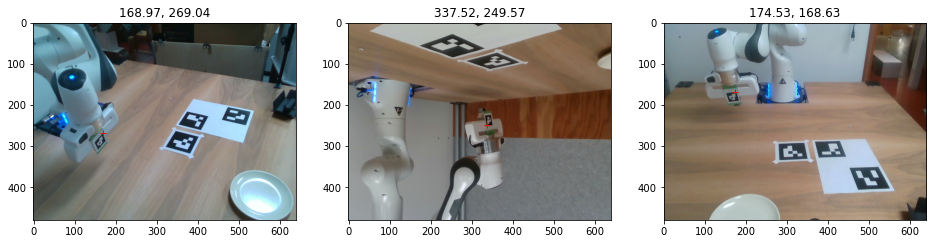

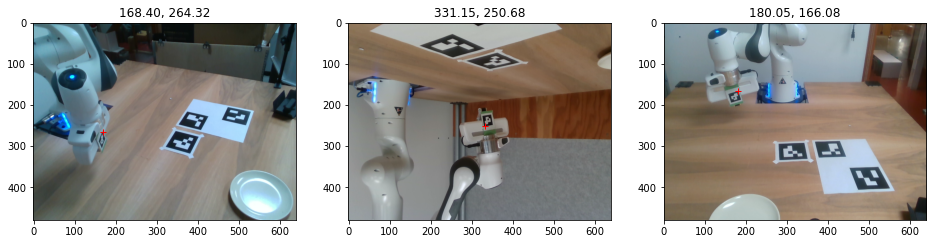

In [27]:
for i,d in enumerate(data[:3]):
    plt.figure(figsize=(16,10))
    for j, img in enumerate(d['imgs']):
        plt.subplot(1,3,j+1)
        plt.imshow(img[:,:,::-1])
        if d['corners'][j] is not None:
            x,y = d['corners'][j]
            plt.plot(x,y, 'r+')
            plt.title(f'{x:.2f}, {y:.2f}')

## Cleanup Data

In [28]:
for d in data:
    del d['imgs']

In [29]:
data[0]

{'pos': tensor([ 0.3124, -0.2017,  0.2122]),
 'ori': tensor([ 0.8507, -0.5183, -0.0854, -0.0171]),
 'intrinsics': [{'coeffs': [0.0, 0.0, 0.0, 0.0, 0.0],
   'fx': 601.3736572265625,
   'fy': 600.106201171875,
   'height': 480,
   'model': <distortion.inverse_brown_conrady: 2>,
   'ppx': 321.1289978027344,
   'ppy': 234.91824340820312,
   'width': 640},
  {'coeffs': [0.0, 0.0, 0.0, 0.0, 0.0],
   'fx': 617.29931640625,
   'fy': 617.279541015625,
   'height': 480,
   'model': <distortion.inverse_brown_conrady: 2>,
   'ppx': 326.6946105957031,
   'ppy': 242.78466796875,
   'width': 640},
  {'coeffs': [0.0, 0.0, 0.0, 0.0, 0.0],
   'fx': 612.9444580078125,
   'fy': 613.3717041015625,
   'height': 480,
   'model': <distortion.inverse_brown_conrady: 2>,
   'ppx': 330.5389709472656,
   'ppy': 237.0594482421875,
   'width': 640}],
 'corners': [[167.50543212890625, 271.86236572265625],
  None,
  [172.42918395996094, 170.3325653076172]]}

In [31]:
with open('caldata_with_corners.pkl','wb') as f:
    pickle.dump(data, f)